## Final Project Submission

Please fill out:
* Student name: Grace Nekesa 
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:https://github.com/Grace-01-cell/dsc-phase-1-project-v2-4.git







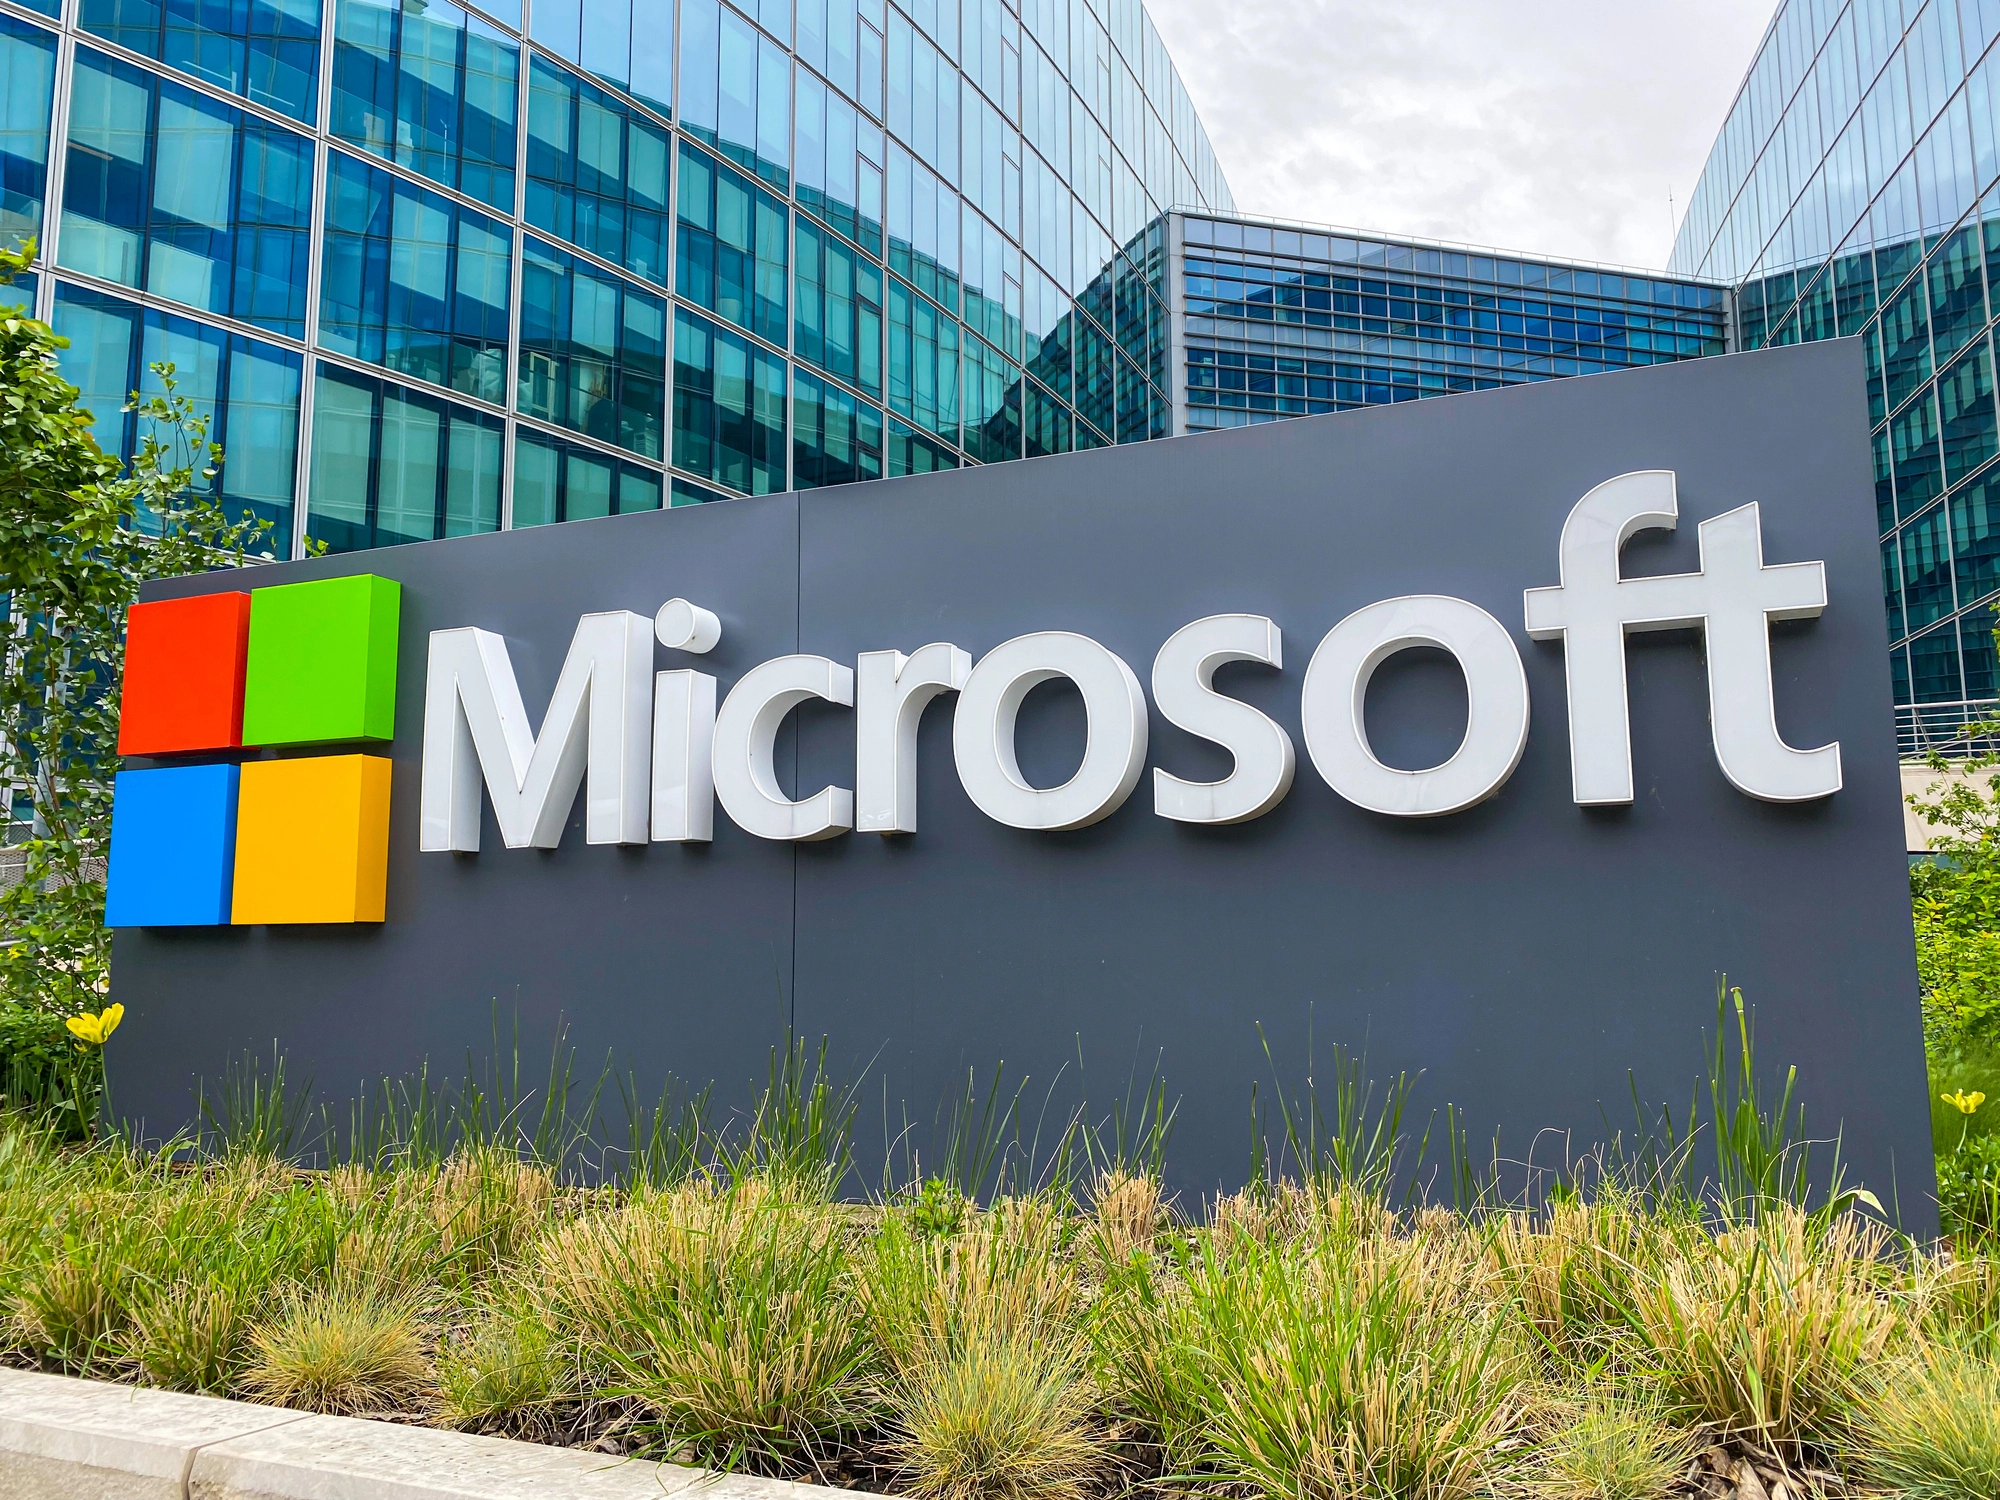

# Overview

This project analyzes the resource needed by Microsoft company before starting the production of movies. Microsoft company should do analysis to the data to make a distinct resolution before starting and investing in production.

  We start by understanding and Analyzing our data  from the six datasets that were given.

 #  BUSINESS PROBLEM

Microsoft sees all of the big companies producing original video content and wants in on the action. They've decided to start a new movie studio, but they know nothing about filmmaking. You are tasked with determining which types of films are currently performing well at the box office. You must then translate your findings into actionable insights that the head of Microsoft's new studio can use to help decide what kinds of films to make.

# 1.Data underatanding in BOX OFFICE MOJO :bom.movie_gross.csv

loading the data

In [8]:
# We import the packages
import numpy as np # for the calculations in the data
import seaborn as sns 
#for visualization purposes
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
data = pd.read_csv("data2/bom.movie_gross.csv")
data


FileNotFoundError: [Errno 2] No such file or directory: 'data2/bom.movie_gross.csv'

In [10]:
#to find duplicated data in the dataset
data.duplicated().value_counts()

NameError: name 'data' is not defined

In [ ]:
data.shape

(3387, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
#to find the missing values in the dataset
data.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [ ]:
#to find the sum of all the missing values
data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
data.describe()# to have categorical distribution of the dataset

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


 # Data cleaning

dropping the column foreign_gross that has a lot of missing data since it has more tha 50% of the missing and data and so we cannot move forward such large numbers of missing data

In [ ]:
data.drop("foreign_gross",axis = 1, inplace=True )
 

In [ ]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


The row with missing value foreign gross has been eliminated

In [ ]:
 # to get information about the data after dropping the row with missing values
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


There are also few null data in the domestic_gross.A better way is by replacing it with the median since it has categorical values and  does not affect the distribution.we can not drop the whole column

In [ ]:
data['domestic_gross'].fillna(data['domestic_gross'].median(), inplace = True)

In [ ]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


lets replace the missing values in the studio column with the mode :the most common studio

In [ ]:
mode_studio = data["studio"].mode()
data["studio"].fillna(mode_studio, inplace = True)

In [ ]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [ ]:
data.isna()#to check for missing values

,title,studio,domestic_gross,year
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3382,False,False,False,False
3383,False,False,False,False
3384,False,False,False,False
3385,False,False,False,False


the data is now clean and ready for analysis

# ANALYSIS

lets do analysis on the data of studios and how it affects the domestic gross to a company

In [ ]:
studio_data = data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)#group data of studio and domestic gross

In [ ]:
top_12_studios = studio_data[:10]#to call the sample of studios .

visualization

lets show our analysis in visualization for easy understanding

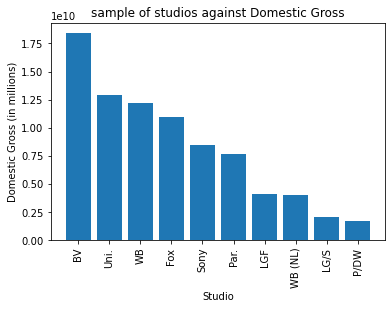

In [ ]:
# plot a graph of sample studios with domestic gross 
plt.bar(top_12_studios.index, top_12_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('sample of studios against Domestic Gross')
plt.show()

# observation

The graph displays the top 12 studios based on their domestic gross in millions. The graph is a bar chart, where the x-axis shows the name of the studios, and the y-axis shows their domestic gross in millions. The bar chart is easy to read and understand, and the use of color can enhance the presentation.
Based on the graph, it is clear that the Walt Disney Studios Motion Pictures is the top-grossing studio, with a domestic gross of over $11 billion, followed by Warner Bros. Pictures, Universal Pictures, and Sony Pictures Entertainment. The graph also shows that the top 12 studios have a significant lead over the other studios in terms of domestic gross.


Microsoft thus should;
Partner with the top-performing studios:  it may want to consider partnering with the top-performing studios such as Walt Disney Studios Motion Pictures, Warner Bros. Pictures, or Universal Pictures to leverage their success and increase its own revenue.

Invest in the production of popular movie genres: The company can analyze the genres of the top-grossing movies produced by the studios and invest in producing movies in those genres. This strategy can increase the likelihood of the company's success and profitability.

# 2.Data understanding in IMDB database

In [ ]:
import sqlite3 # this is to import  the SQL database 
conn = sqlite3.connect("data2/im.db")#this is loading the database

In [ ]:
#from the sql data base acess the movie basics
im_df = pd.read_sql("""
                    SELECT * FROM
                    movie_basics
                    
                    """,conn)

In [ ]:
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [ ]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
im_df.isna().sum()# to find the sum of all the missing values


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [ ]:
im_df.describe()#for statistical distributions

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [ ]:
 # From the data base in the table access how the movies are being  rated
imdf=pd.read_sql("""
                    SELECT * FROM
                    movie_ratings
                 ORDER BY numvotes DESC;
                    """,conn)

In [ ]:
imdf

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
...,...,...,...
73851,tt8420530,6.8,5
73852,tt8747790,4.6,5
73853,tt9367004,8.2,5
73854,tt9647642,2.0,5


In [ ]:
imdf.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

 there are no missing values and so the data is clean and ready for analysis

lets join the movie_basics table with the movie ratings using movie_id as the primary key and order by the numvotes column in a descending 
manner to give a view of both movie basics and movie ratings

In [ ]:
joined_table=pd.read_sql("""
                    SELECT * FROM
                    movie_ratings
                    JOIN movie_basics
                      USING(movie_id)
                      ORDER BY numvotes DESC;
                    """,conn)

In [ ]:
joined_table

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
73851,tt8420530,6.8,5,Tia and Piujuq,Tia and Piujuq,2018,80.0,Family
73852,tt8747790,4.6,5,A Monks Madness,A Monks Madness,2018,NaN,Action
73853,tt9367004,8.2,5,Up to the Last Drop: The Secret Water War in E...,Mehri tin teleftaia stagona: O mystikos polemo...,2017,58.0,Documentary
73854,tt9647642,2.0,5,The Confederate,The Confederate,2018,99.0,History


In [ ]:
joined_table.isna().sum()# to find the missing values in the joined table

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [ ]:
joined_table.info()#information about the whole table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [ ]:
joined_table["genres"].mode()[0]# since there are few missing numbers in genre column, we find the most common and replace it with the missing value so we use mode

'Drama'

we replace the missing values in genre with mode i.e 'drama'

In [ ]:
mode_joined_table = joined_table["genres"].mode()[0]

joined_table["genres"].fillna("mode_joined_table",inplace = True)

In [ ]:
joined_table.info()#total information about the table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73856 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


we still have missing values in runtime minutes,we will have to replace the runtime with mean,we will use mean since mean is more efficient in categorical data and its least affected in the distribution

In [ ]:
mean_joined_table = joined_table["runtime_minutes"].mean()
joined_table["runtime_minutes"].fillna("mean_joined_table",inplace = True)

In [ ]:
joined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  73856 non-null  object 
 7   genres           73856 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


Both columns have the same number of rows,this means there are no missing values in the joined table

The data is now clean and ready for analysis

# ANALYSIS

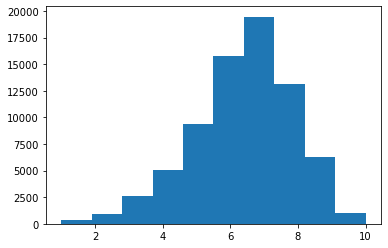

In [ ]:
#ploting a histogram of observation in the averagerating
plt.hist(joined_table["averagerating"], bins = 10);

# observation

The histogram has 10 bins which represent the range of values of 'averagerating' data divided into 10 equal intervals. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.



The distribution of 'averagerating' appears to be slightly skewed to the right, indicating that the majority of the films have a rating of 6-8 on a scale of 1-10.

lets  join the tables to find the ralationship between movie genre averagerating and num of vote

In [ ]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 6.7 AND 9.2
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)
                   

In [ ]:
im_db

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [ ]:
genres_sorted_mean = pd.DataFrame(joined_table.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",181285.417323
"Adventure,Mystery,Sci-Fi",135042.500000
"Action,Fantasy,War",131509.000000
"Adventure,Drama,Sci-Fi",99316.950000
"Action,Adventure,Fantasy",93775.563107
"Biography,Drama,Thriller",84506.909091
"Action,Crime,Sci-Fi",78214.125000
"Action,Adventure,Thriller",74964.800000
"Action,Adventure,Mystery",66149.272727


<BarContainer object of 10 artists>

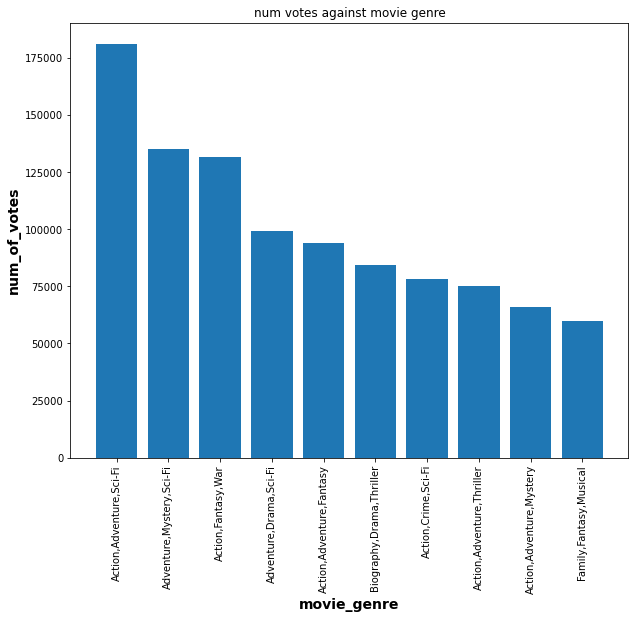

In [ ]:
#ploting a bar graph of number of votes against movie genre
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.title("num votes against movie genre")
plt.xlabel("movie_genre", fontsize=14, fontweight='bold')
plt.ylabel("num_of_votes", fontsize =14, fontweight= 'bold')
plt.bar(y.index,y.values)

# observation

The plot can be useful in determining which movie genres are more popular among users, which can be useful in making marketing and distribution decisions for movies.

# 3.DATA UNDERSTANDING IN the numbers movies budgets

In [ ]:
frame = pd.read_csv("data2/tn.movie_budgets.csv")#loading the dataset
frame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
frame.info()#to find all the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data cleaning

the domestic_gross,worldwide_gross and production_budget are all objects.
We cannot work with currencies as float,we need to convert them to intergers or float.
we will opt to using floats since we are not sure if they are all intergers
 we will to remove the remove dollar signs and commas from Salary column for easy analysis

 

In [ ]:
frame['production_budget'] = frame['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
frame['domestic_gross'] = frame['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
frame['worldwide_gross'] = frame['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)



# Verify that the column is now a float data type
print(frame.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


The date is also an object,we have to change it to intergers

In [ ]:
frame['release_date'] = pd.to_datetime(frame['release_date'])
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [ ]:
frame['year'] = frame['release_date'].dt.year
frame['month'] = frame['release_date'].dt.month
frame['day'] = frame['release_date'].dt.day

#we print the updated dataframe
print(frame)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  year  month  day  
0           425000000.0     760507625.0     2.776345e+09  2009     12   18  
1    

In [ ]:
frame.head()#to find the first five elements

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15


The data set is now clean and ready for analysis

# ANALYSIS


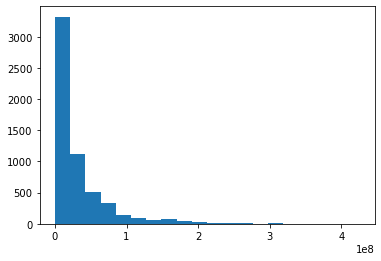

In [ ]:
#ploting a histogram to find the distribution of production budget
plt.hist(frame['production_budget'],bins = 20);

The histogram has 10 bins which represent the range of values of 'production_budget' data divided into 10 equal intervals. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.



Distribution of Production Budget: For each movie in the dataset, the histogram displays how much was spent on production. The production budget range is represented by the x-axis, while the frequency of films falling into each range is shown by the y-axis. How many films fall within each production budget range is shown by the histogram.

we find the return on investment ROI of the dataset

In [ ]:
frame['ROI'] = ((frame['worldwide_gross'] - frame['production_budget']) / frame['production_budget']) * 100
frame.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,ROI
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,315.369636


##

In [ ]:
# Create a new column that contains the month that the movies were released
release_time = frame.copy()

release_time['release_month'] = release_time["release_date"].dt.strftime('%B').astype(str)

release_time.head() # Preview the updated 'release_time_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,ROI,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,553.257713,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,154.667286,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-57.210757,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,324.384139,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,315.369636,December


create a plot that shows average return on investment by month

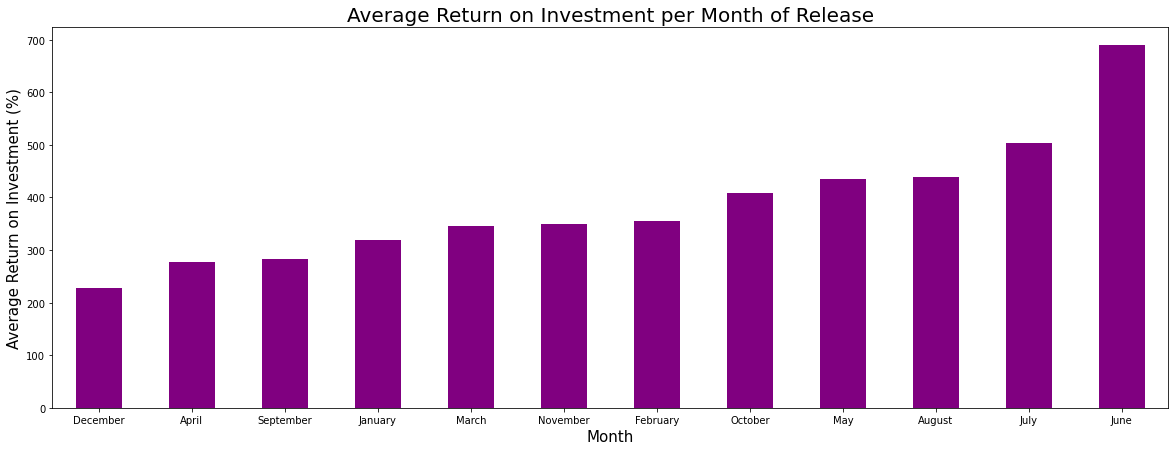

In [ ]:

#ROI by month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['ROI'].mean().sort_values().plot(kind='bar', color='purple')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=20);

observation

We can infer which months have higher or lower ROI for movie releases by examining this plot. For example, if the bars are generally higher towards the right-hand side of the plot (i.e., later months of the year), it could imply that movies released during the holiday season have a higher ROI. If, on the other hand, the bars are generally lower towards the left-hand side of the plot (i.e., the earlier months of the year), it may imply that films released early in the year have lower ROI. Overall, this plot provides useful insights for microsoft to make strategic decisions about when to release their films.

Distribution of released films per month

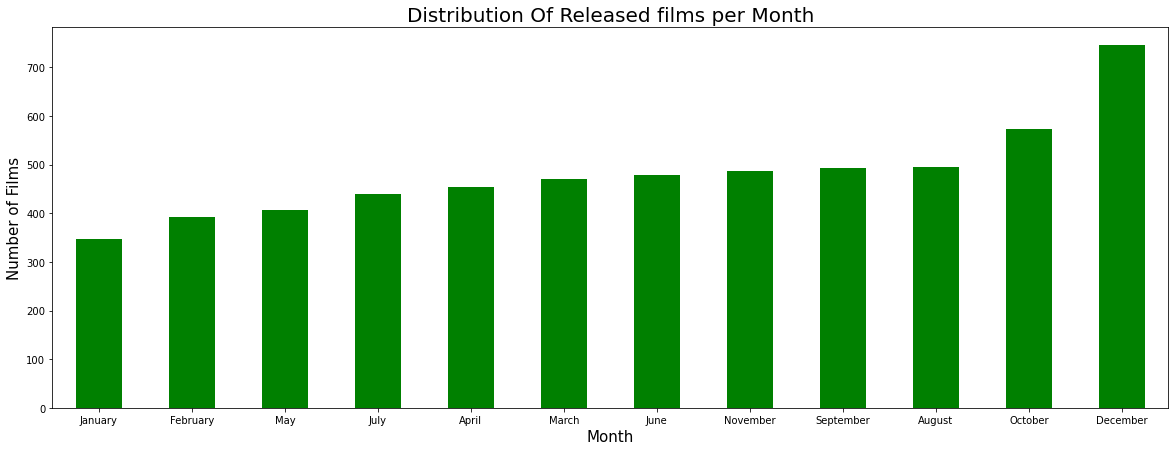

In [ ]:
# Create a plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['movie'].count().sort_values().plot(kind='bar', color='green')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Released films per Month', fontsize=20);

observation

The months with the most film releases are August, September, and October. This data can help microsoft studios to plan their release schedules, as they may face increased competition during these months.
The months with the fewest film releases are January, February, and April. These months may provide an opportunity for microsoft to release their films with less competition.

  # correlation

In [ ]:
frame["production_budget"].corr(frame["domestic_gross"])#relation between production_budget and domestic_gross


0.6856818396752733

In [ ]:
#the relationship between production_budget and worldwide_gross
frame["production_budget"].corr(frame["worldwide_gross"])

0.7483059765694753

In [ ]:
#The correlation in percentage for production budget and domesticgross
correlation_pr_dm = round(frame['production_budget'].corr(frame['domestic_gross']),4)*100
print("The correlation between production budget and domestic revenue is :", correlation_pr_dm,"%")

The correlation between production budget and domestic revenue is : 68.57 %


In [ ]:
#the correlation in percentage between production budget and worlwide gross
correlation_pr_ww = round(frame['production_budget'].corr(frame['worldwide_gross']), 4)*100
print("The correlation between production budget and worldwide revenue is :", correlation_pr_ww, "%")

The correlation between production budget and worldwide revenue is : 74.83 %


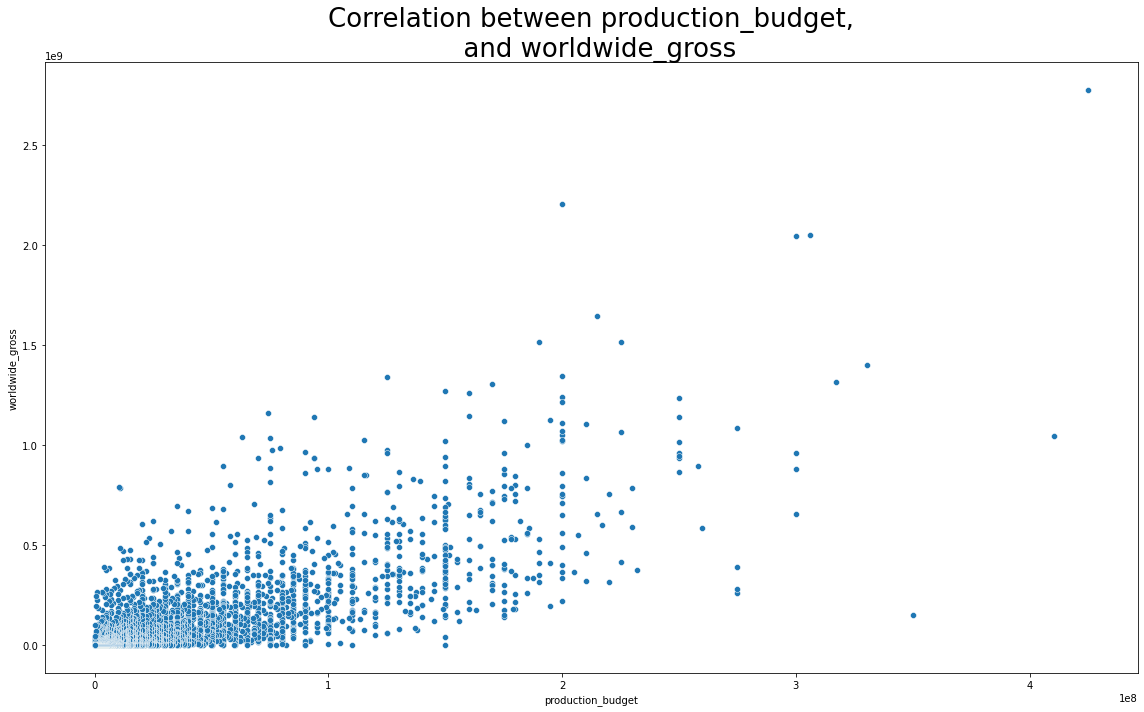

In [ ]:
#ploting to find the correlation between production budget and worldwide gross
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = frame,)
plt.title("Correlation between production_budget,\n  and worldwide_gross", fontsize=26)
plt.tight_layout()
plt.show() 


# observation

The graph shows a scatterplot of the production budget on the x-axis and worldwide gross on the y-axis, with each data point representing a movie. Here are some recommendations based on the plot:
1.There is a positive correlation between the production budget and worldwide gross: The scatterplot shows a general trend where movies with higher production budgets tend to have higher worldwide gross. Therefore, Microsoft company may want to consider increasing their production budget to increase their chances of higher worldwide gross.


From the correlation, microsoft should consider Expanding to international markets:  it's worth noting that the top studios are also successful in international markets. Therefore, the company can consider expanding to international markets to increase revenue and compete with the top studios.

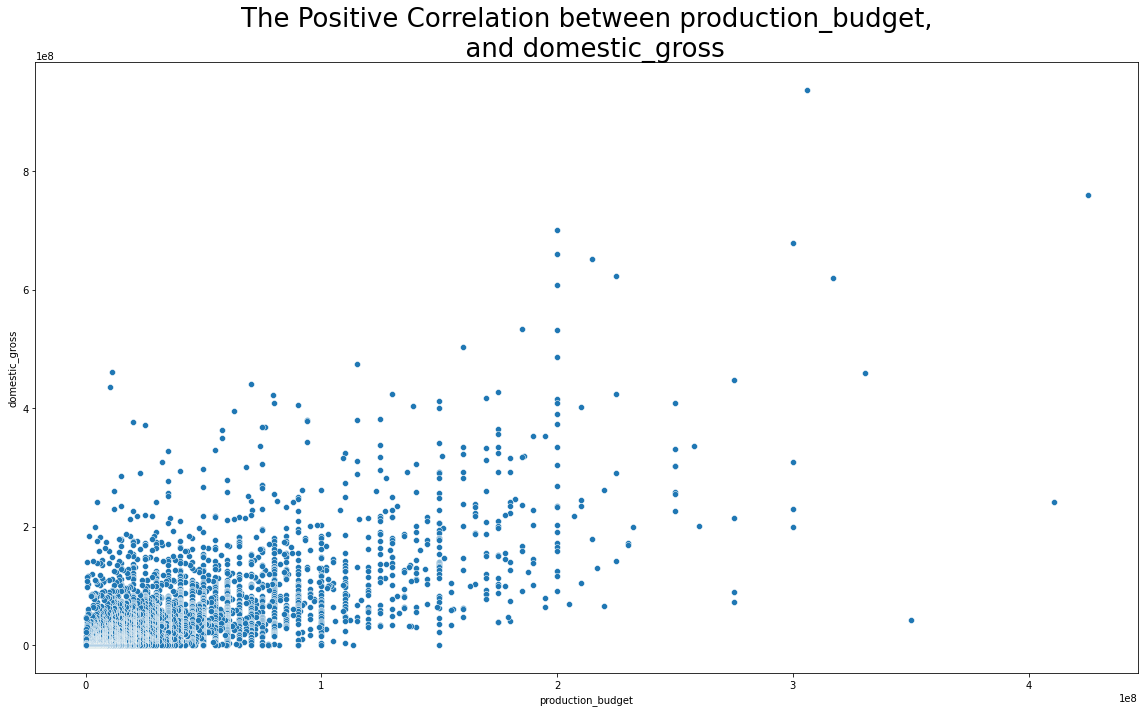

In [ ]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = frame,)
plt.title("The Positive Correlation between production_budget,\n  and domestic_gross", fontsize=26)
plt.tight_layout()
plt.show() 

observation

There is a positive correlation between the production budget and domestic gross: The scatterplot shows a general trend where movies with higher production budgets tend to have higher domestic gross. Therefore, microsoft may want to consider increasing their production budget to increase their chances of higher domestic gross.

# RECOMENDATIONS

 1. Microsoft should consider Partnering with the top-performing studios: it may want to consider partnering with the top-performing studios such as Walt Disney Studios Motion Pictures, Warner Bros. Pictures, or Universal Pictures to leverage their success and increase its own revenue.

 2. The months with the most film releases are August, September, and October. This data can help microsoft studios to plan their release schedules, as they may face increased competition during these months.
The months with the fewest film releases are January, February, and April. These months may provide an opportunity for microsoft to release their films with less competition.

3. we can determine which months have a higher or lower ROI for movie releases movies released during the holiday season have a higher ROI. films released earlier in the year have lower ROI. Overall, this  gives Microsoft useful information for making strategic decisions about when to release their films.